In [1]:
# Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
# Import config file
from config import weatherApiKey
# Import the datetime module from the datetime library.
from datetime import datetime
import time
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
latLngs = zip(lats, lngs)
latLngs

In [3]:
# Covert the latitudes and longitudes from zip object into a list
coordinates = list(latLngs)
coordinates[0:5]

[(-66.89788279115234, -49.11978032638052),
 (-89.22655173237001, -107.93405841436041),
 (-67.93643779654495, -147.05945465445663),
 (23.877691169791575, 166.08734339961939),
 (-41.488553643122444, 71.46691234181938)]

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

590

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherApiKey

# Create an empty list to hold the weather data.   
cityData = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
recordCount = 1
setCount = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposesf
    if (i % 50 == 0 and i >= 50):
        setCount += 1
        recordCount = 1
    # Create endpoint URL with each city
    cityUrl = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {recordCount} of Set {setCount} | {city}")
    # Add 1 to the record count.
    recordCount += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        cityWeather = requests.get(cityUrl).json()
        # Parse out the needed data
        cityLat = cityWeather["coord"]["lat"]
        cityLng = cityWeather["coord"]["lon"]
        cityMaxTemp = cityWeather["main"]["temp_max"]
        cityHumidity = cityWeather["main"]["humidity"]
        cityClouds = cityWeather["clouds"]["all"]
        cityWind = cityWeather["wind"]["speed"]
        cityCountry = cityWeather["sys"]["country"]
        # Convert the date to ISO standard.
        cityDate = datetime.utcfromtimestamp(cityWeather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        cityData.append({
            "City" : city.title(),
            "Lat" : cityLat,
            "Lng" : cityLng,
            "Max Temp" : cityMaxTemp,
            "Humidity" : cityHumidity,
            "Cloudiness" : cityClouds,
            "Wind Speed": cityWind,
            "Country": cityCountry,
            "Date": cityDate})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



 38 of Set 3 | bethel
Processing Record 39 of Set 3 | nanortalik
Processing Record 40 of Set 3 | wajima
Processing Record 41 of Set 3 | bredasdorp
Processing Record 42 of Set 3 | esperance
Processing Record 43 of Set 3 | grindavik
Processing Record 44 of Set 3 | jiwani
Processing Record 45 of Set 3 | namibe
Processing Record 46 of Set 3 | east london
Processing Record 47 of Set 3 | albion
Processing Record 48 of Set 3 | bondo
Processing Record 49 of Set 3 | guajara-mirim
City not found. Skipping...
Processing Record 50 of Set 3 | narsaq
Processing Record 1 of Set 4 | college
Processing Record 2 of Set 4 | takanosu
Processing Record 3 of Set 4 | mbandaka
Processing Record 4 of Set 4 | airai
Processing Record 5 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 6 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 7 of Set 4 | hasaki
Processing Record 8 of Set 4 | geraldton
Processing Record 9 of Set 4 | constitucion
Processing Record 10 of Set 4 | arraial

In [6]:
# Get the number of the retrieved cities
len(cityData)

533

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
cityDataDF = pd.DataFrame(cityData)
cityDataDF.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,32.00,91,75,3.36,AR,2020-07-11 15:10:20
1,Punta Arenas,-53.15,-70.92,35.01,86,75,11.41,CL,2020-07-11 15:10:20
2,Mataura,-46.19,168.86,44.08,91,100,3.51,NZ,2020-07-11 15:10:21
3,Butaritari,3.07,172.79,82.42,80,100,15.55,KI,2020-07-11 15:10:21
4,Mahebourg,-20.41,57.70,71.60,68,75,12.75,MU,2020-07-11 15:10:21
5,Houma,29.60,-90.72,91.00,79,20,8.05,US,2020-07-11 15:09:31
6,Puerto Ayora,-0.74,-90.35,68.00,90,100,1.01,EC,2020-07-11 15:10:21
7,Beringovskiy,63.05,179.32,48.96,82,99,3.09,RU,2020-07-11 15:10:21
8,Sistranda,63.73,8.83,53.60,81,75,17.22,NO,2020-07-11 15:10:21
9,Qaanaaq,77.48,-69.36,44.64,60,93,5.06,GL,2020-07-11 15:10:21


In [8]:
columnOrder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
cityDataDF = cityDataDF[columnOrder]
cityDataDF.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-07-11 15:10:20,-54.80,-68.30,32.00,91,75,3.36
1,Punta Arenas,CL,2020-07-11 15:10:20,-53.15,-70.92,35.01,86,75,11.41
2,Mataura,NZ,2020-07-11 15:10:21,-46.19,168.86,44.08,91,100,3.51
3,Butaritari,KI,2020-07-11 15:10:21,3.07,172.79,82.42,80,100,15.55
4,Mahebourg,MU,2020-07-11 15:10:21,-20.41,57.70,71.60,68,75,12.75
5,Houma,US,2020-07-11 15:09:31,29.60,-90.72,91.00,79,20,8.05
6,Puerto Ayora,EC,2020-07-11 15:10:21,-0.74,-90.35,68.00,90,100,1.01
7,Beringovskiy,RU,2020-07-11 15:10:21,63.05,179.32,48.96,82,99,3.09
8,Sistranda,NO,2020-07-11 15:10:21,63.73,8.83,53.60,81,75,17.22
9,Qaanaaq,GL,2020-07-11 15:10:21,77.48,-69.36,44.64,60,93,5.06


In [9]:
# Create the output file (CSV).
outputDataFile = os.path.join("weather_data", "cities.csv")
# Export the City_Data into a CSV.
cityDataDF.to_csv(outputDataFile, index_label="City_ID")


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = cityDataDF["Lat"]
maxTemps = cityDataDF["Max Temp"]
humidity = cityDataDF["Humidity"]
cloudiness = cityDataDF["Cloudiness"]
windSpeed = cityDataDF["Wind Speed"]

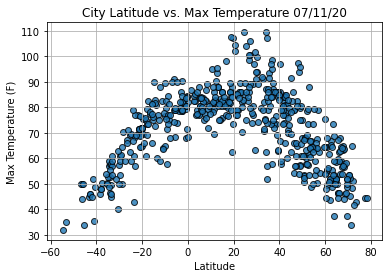

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            maxTemps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)
            
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1_LatMaxTemp.png")

# Show plot.
plt.show()

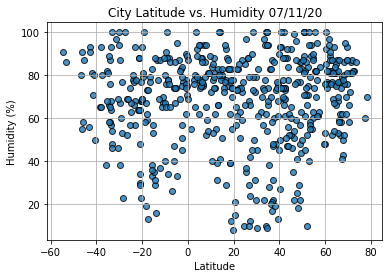

In [12]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)
            
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2_LatHumidity.png")

# Show plot.
plt.show()

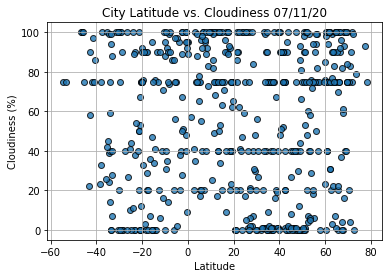

In [13]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)
            
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3_LatCloudiness.png")

# Show plot.
plt.show()

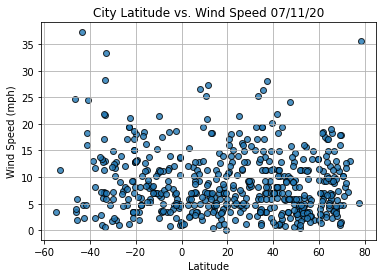

In [14]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            windSpeed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label=cities)
            
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4_LatWindSpeed.png")

# Show plot.
plt.show()

In [53]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plotLinearRegression(xValues, yValues, title, yLabel, textCoordinates):
    
    # Perform linear regression.
    (slope, intercept, rval, pval, stderr) = linregress(xValues,yValues)
    # Get the equation of the line.
    lineEq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    # Calculate the regression line "y values" from the slope and intercept.
    regressValue = [(slope * x + intercept) for x in xValues]
    print(f"The r value is: {rval}")
    
    # Create a scatter plot and plot the regression line
    plt.scatter(xValues,yValues)
    plt.plot(xValues,regressValue,color ="red")
    # Annotate the text for the line equation.
    plt.annotate(lineEq, textCoordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(yLabel)
    plt.show()

In [35]:
index13 = cityDataDF.loc[13]
index13

City                        Kutum
Country                        SD
Date          2020-07-11 15:10:22
Lat                          14.2
Lng                         24.67
Max Temp                    83.23
Humidity                       41
Cloudiness                     53
Wind Speed                   6.22
Name: 13, dtype: object

In [46]:
# Create Northern and Southern Hemispheres from cityData DataFrame
northernHemiDF = cityDataDF.loc[(cityDataDF["Lat"]>=0)]
southernHemiDF = cityDataDF.loc[(cityDataDF["Lat"]<0)]

The r value is: -0.7045016133671711


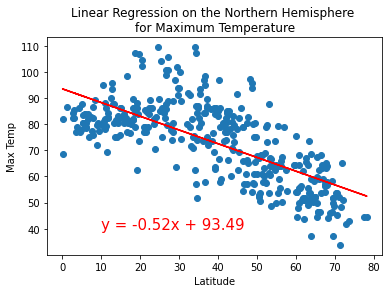

In [55]:
# Linear regression on the Northern Hemisphere for Maximum Temperature
xValues = northernHemiDF["Lat"]
yValues = northernHemiDF["Max Temp"]
# Call the function.
plotLinearRegression(xValues, yValues,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

The r value is: 0.854503667472994


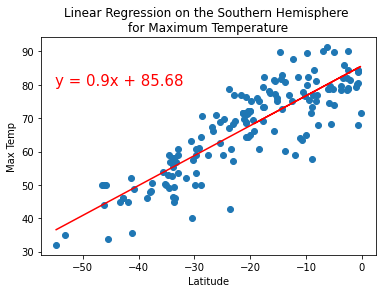

In [56]:
# Linear regression on the Southern Hemisphere for Maximum Temperature
xValues = southernHemiDF["Lat"]
yValues = southernHemiDF["Max Temp"]
# Call the function.
plotLinearRegression(xValues, yValues,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-55,80))

The r value is: 0.05287637062232863


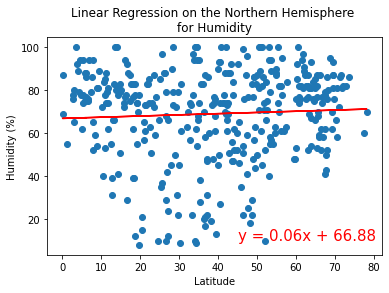

In [83]:
# Linear regression on the Northern Hemisphere for Humidity (%)
xValues = northernHemiDF["Lat"]
yValues = northernHemiDF["Humidity"]
# Call the function.
plotLinearRegression(xValues, yValues,
                       'Linear Regression on the Northern Hemisphere \nfor Humidity', 'Humidity (%)',(45,10))

The r value is: -0.07501947357876719


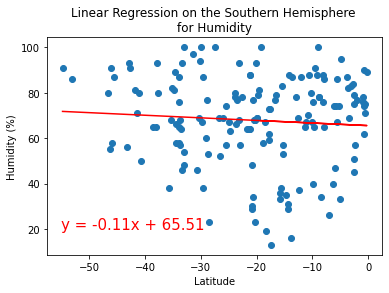

In [82]:
# Linear regression on the Southern Hemisphere for Humidity (%)
xValues = southernHemiDF["Lat"]
yValues = southernHemiDF["Humidity"]
# Call the function.
plotLinearRegression(xValues, yValues,
                       'Linear Regression on the Southern Hemisphere \nfor Humidity', 'Humidity (%)',(-55,20))

The r value is: -0.038821963655054574


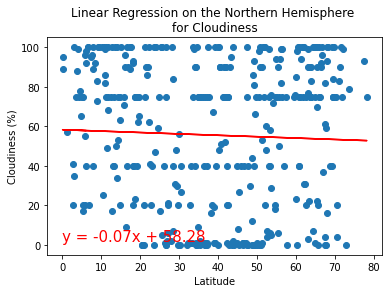

In [81]:
# Linear regression on the Northern Hemisphere for Cloudiness (%)
xValues = northernHemiDF["Lat"]
yValues = northernHemiDF["Cloudiness"]
# Call the function.
plotLinearRegression(xValues, yValues,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 'Cloudiness (%)',(0,2))

The r value is: -0.019125236071172346


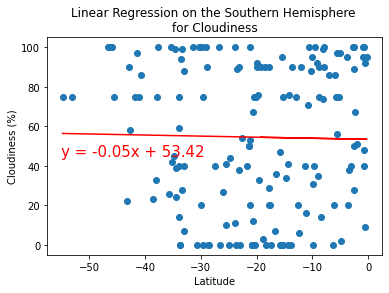

In [80]:
# Linear regression on the Southern Hemisphere for Cloudiness (%)
xValues = southernHemiDF["Lat"]
yValues = southernHemiDF["Cloudiness"]
# Call the function.
plotLinearRegression(xValues, yValues,
                       'Linear Regression on the Southern Hemisphere \nfor Cloudiness', 'Cloudiness (%)',(-55,45))

The r value is: 0.0013100178144144613


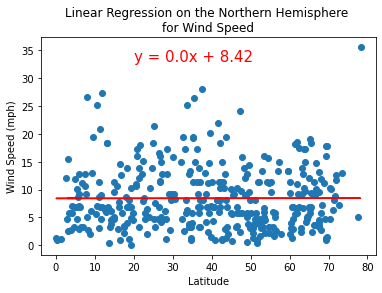

In [79]:
# Linear regression on the Northern Hemisphere for Wind Speed (mph)
xValues = northernHemiDF["Lat"]
yValues = northernHemiDF["Wind Speed"]
# Call the function.
plotLinearRegression(xValues, yValues,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(20,33))

The r value is: -0.16544712017253652


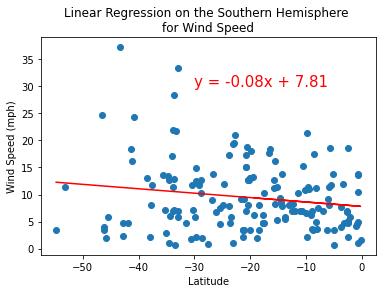

In [78]:
# Linear regression on the Southern Hemisphere for Wind Speed (mph)
xValues = southernHemiDF["Lat"]
yValues = southernHemiDF["Wind Speed"]
# Call the function.
plotLinearRegression(xValues, yValues,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-30,30))